# Importing libraries

In [2]:

# disable all warnings
import warnings
warnings.filterwarnings('ignore')

# numpy and pandas for data manipulation
import pandas as pd
import numpy as np
from scipy import stats

# matplotlib and seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn preprocessing for dealing with categorical variables and normalizing
from sklearn.preprocessing import MinMaxScaler

# sklearn for splitting dataset into training and testting sets and building regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn for metrics
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score,f1_score

# Read Data

In [3]:
#importing data

df_train = pd.read_csv('train.csv')
df_train.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


# Exploratory Data Analysis


In [4]:
# general information about the data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [5]:
#shape of the dataset
print ("The shape of the dataset is:", df_train.shape)
print ("Number of rows are:", df_train.shape[0])
print ("Number of columns are: ", df_train.shape[1])

The shape of the dataset is: (7500, 18)
Number of rows are: 7500
Number of columns are:  18


In [6]:
#unique values of the dataset
print ("Unique values:\n", df_train.nunique())

Unique values:
 Id                              7500
Home Ownership                     4
Annual Income                   5478
Years in current job              11
Tax Liens                          8
Number of Open Accounts           39
Years of Credit History          408
Maximum Open Credit             6963
Number of Credit Problems          8
Months since last delinquent      89
Bankruptcies                       5
Purpose                           15
Term                               2
Current Loan Amount             5386
Current Credit Balance          6592
Monthly Debt                    6716
Credit Score                     268
Credit Default                     2
dtype: int64


In [7]:
#measures of central tendency and quantiles
df_train.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,7500.0,3749.5,2165.2,0.0,1874.8,3749.5,5624.2,7.499000e+03
Annual Income,5943.0,1366391.7,845339.2,164597.0,844341.0,1168386.0,1640137.0,1.014934e+07
Tax Liens,7500.0,0.0,0.3,0.0,0.0,0.0,0.0,7.000000e+00
Number of Open Accounts,7500.0,11.1,4.9,2.0,8.0,10.0,14.0,4.300000e+01
Years of Credit History,7500.0,18.3,7.0,4.0,13.5,17.0,21.8,5.770000e+01
Maximum Open Credit,7500.0,945153.7,16026216.7,0.0,279229.5,478159.0,793501.5,1.304726e+09
Number of Credit Problems,7500.0,0.2,0.5,0.0,0.0,0.0,0.0,7.000000e+00
Months since last delinquent,3419.0,34.7,21.7,0.0,16.0,32.0,50.0,1.180000e+02
Bankruptcies,7486.0,0.1,0.3,0.0,0.0,0.0,0.0,4.000000e+00
Current Loan Amount,7500.0,11873177.4,31926123.0,11242.0,180169.0,309573.0,519882.0,1.000000e+08


In [8]:
df_train.select_dtypes(include='object').describe()

,Home Ownership,Years in current job,Purpose,Term
count,7500,7129,7500,7500
unique,4,11,15,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,3637,2332,5944,5556


In [9]:
df_train['Credit Default'].value_counts()

Credit Default
0    5387
1    2113
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='Credit Default', ylabel='count'>

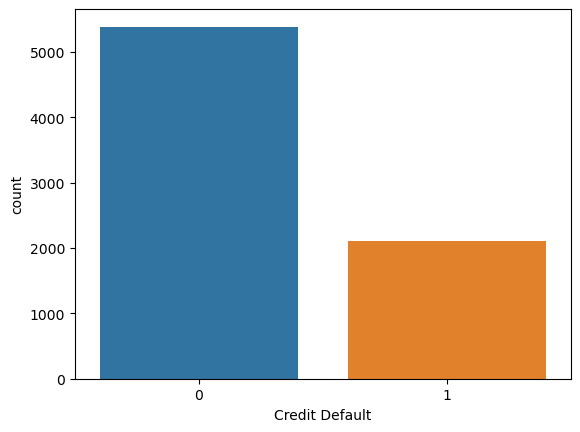

In [10]:
sns.countplot(x='Credit Default', data=df_train)

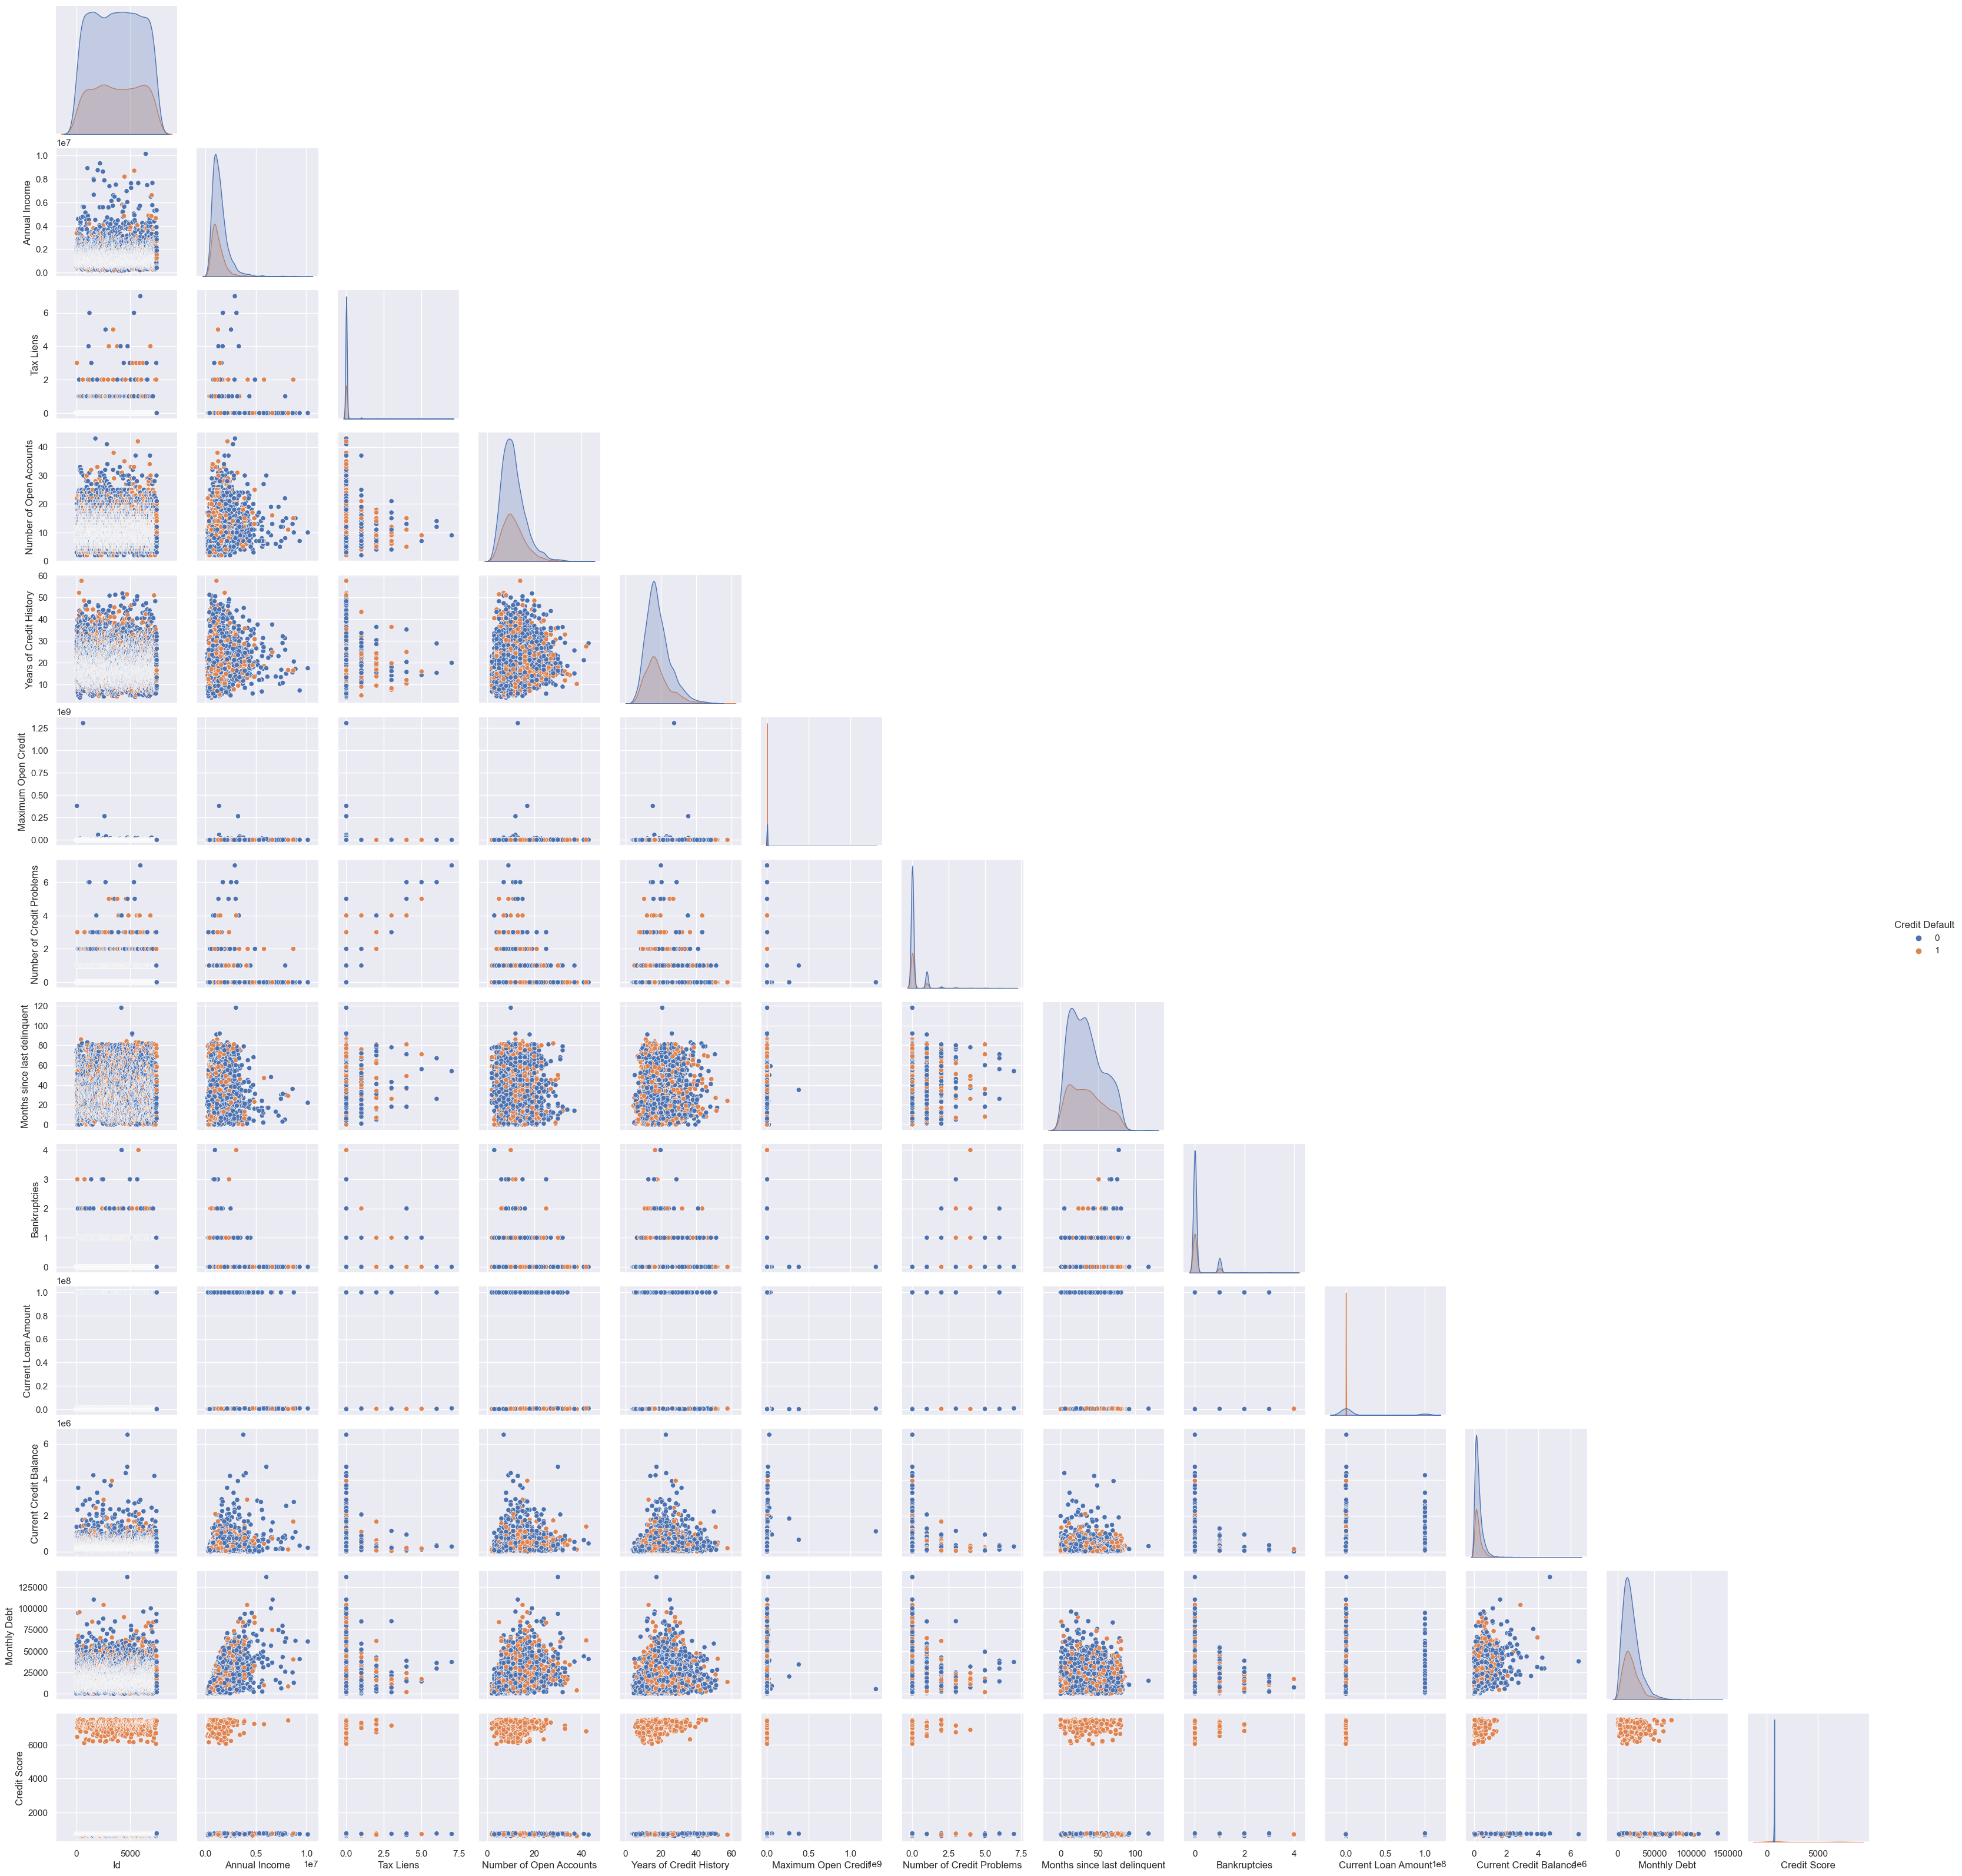

In [69]:
sns.set(rc={'figure.figsize':(14,12)}) 
sns.pairplot(data=df_train, hue='Credit Default', corner=True)

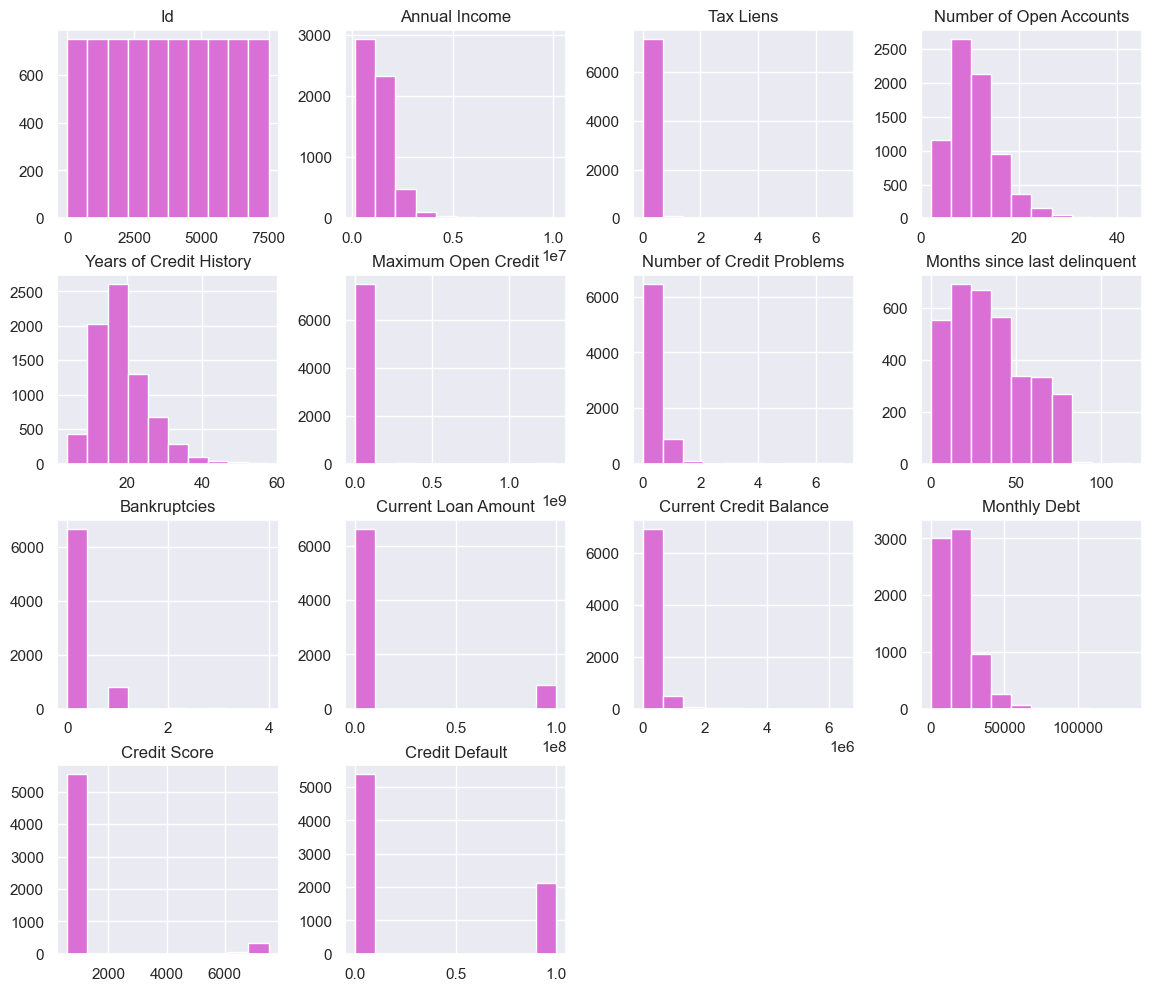

In [70]:
df_train.hist(figsize=(14, 12), color='orchid');

In [71]:
def dist_plot(data, column):
    sns.kdeplot(data[column], color='black',)
    
    # avg line
    plt.axvline(df_train[column].mean(), color='olivedrab', label='mean')
    plt.axvline(df_train[column].median(), color='darkorchid', label='median')
    plt.axvline(df_train[column].mode()[0], color='slateblue', label='mode')
    plt.legend()

    plt.xlabel(column)
    plt.ylabel('Distribution')
    plt.show()

In [72]:
num_cols=df_train._get_numeric_data().columns

print(num_cols)

Index(['Id', 'Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')


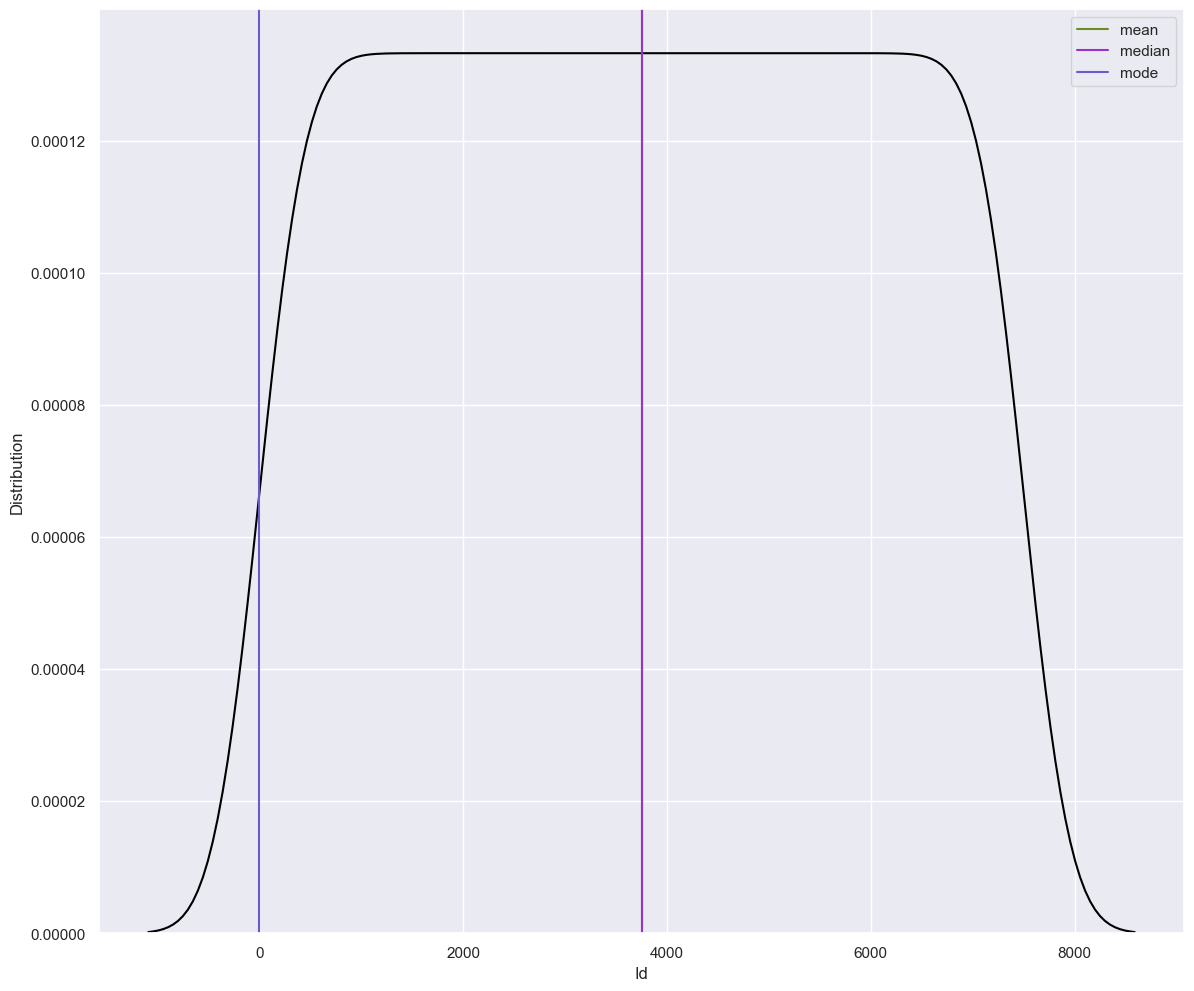

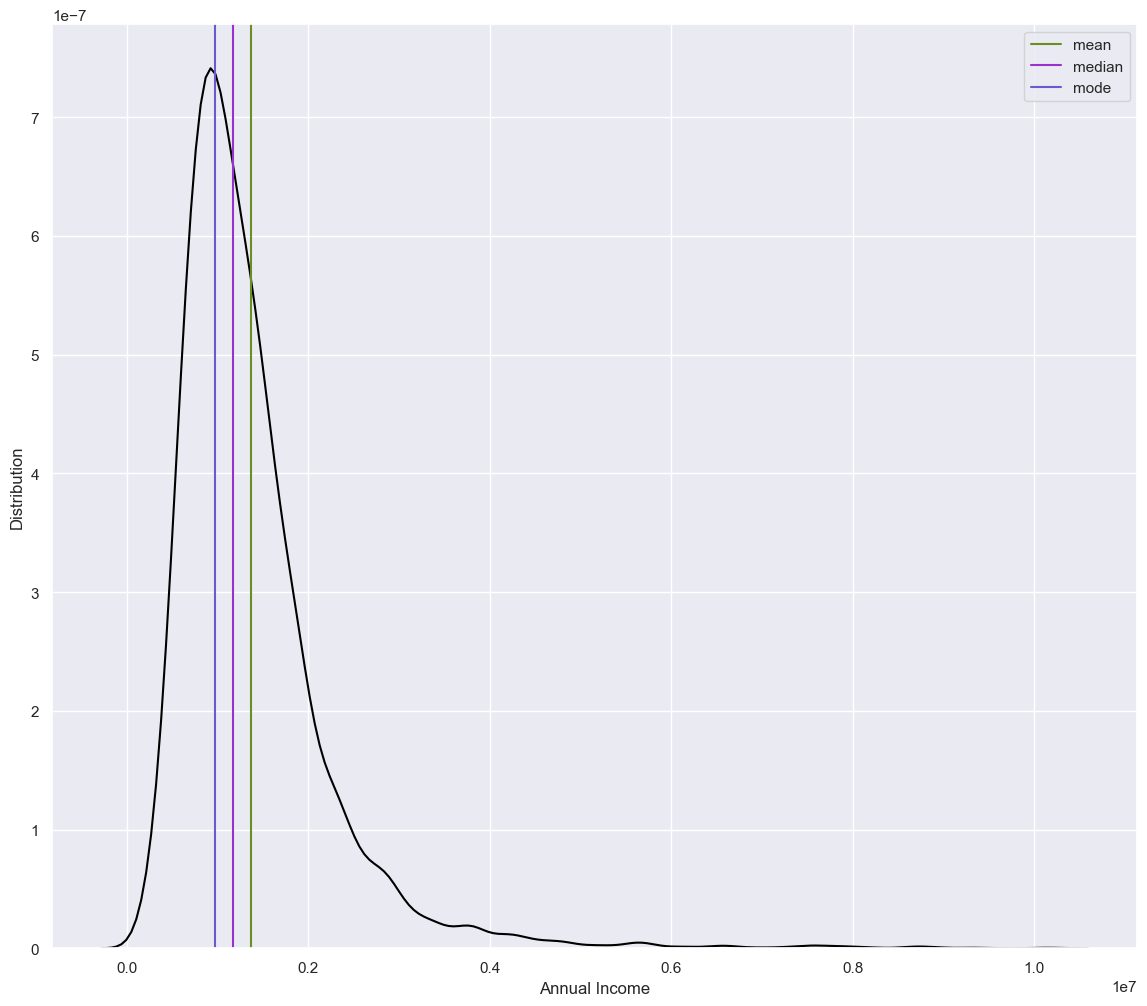

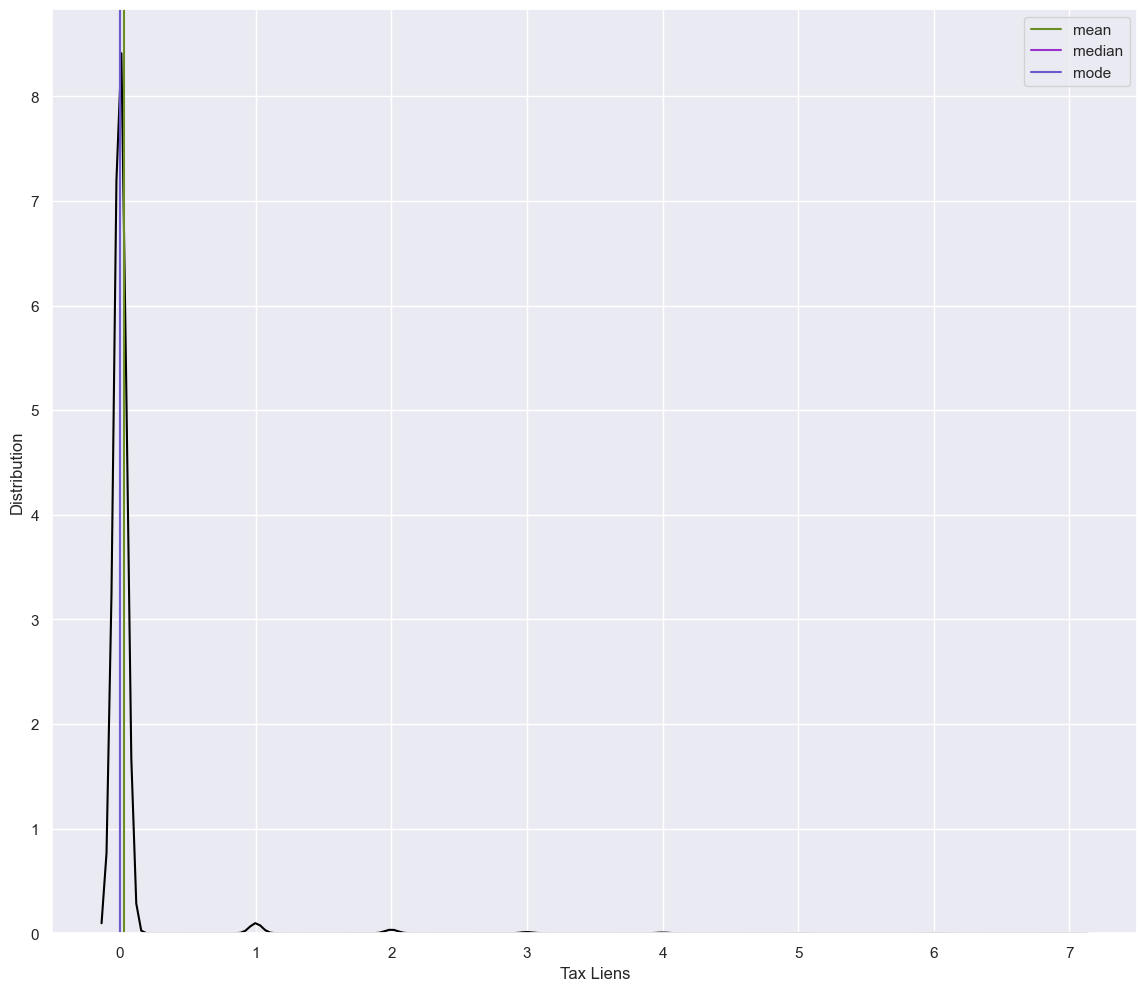

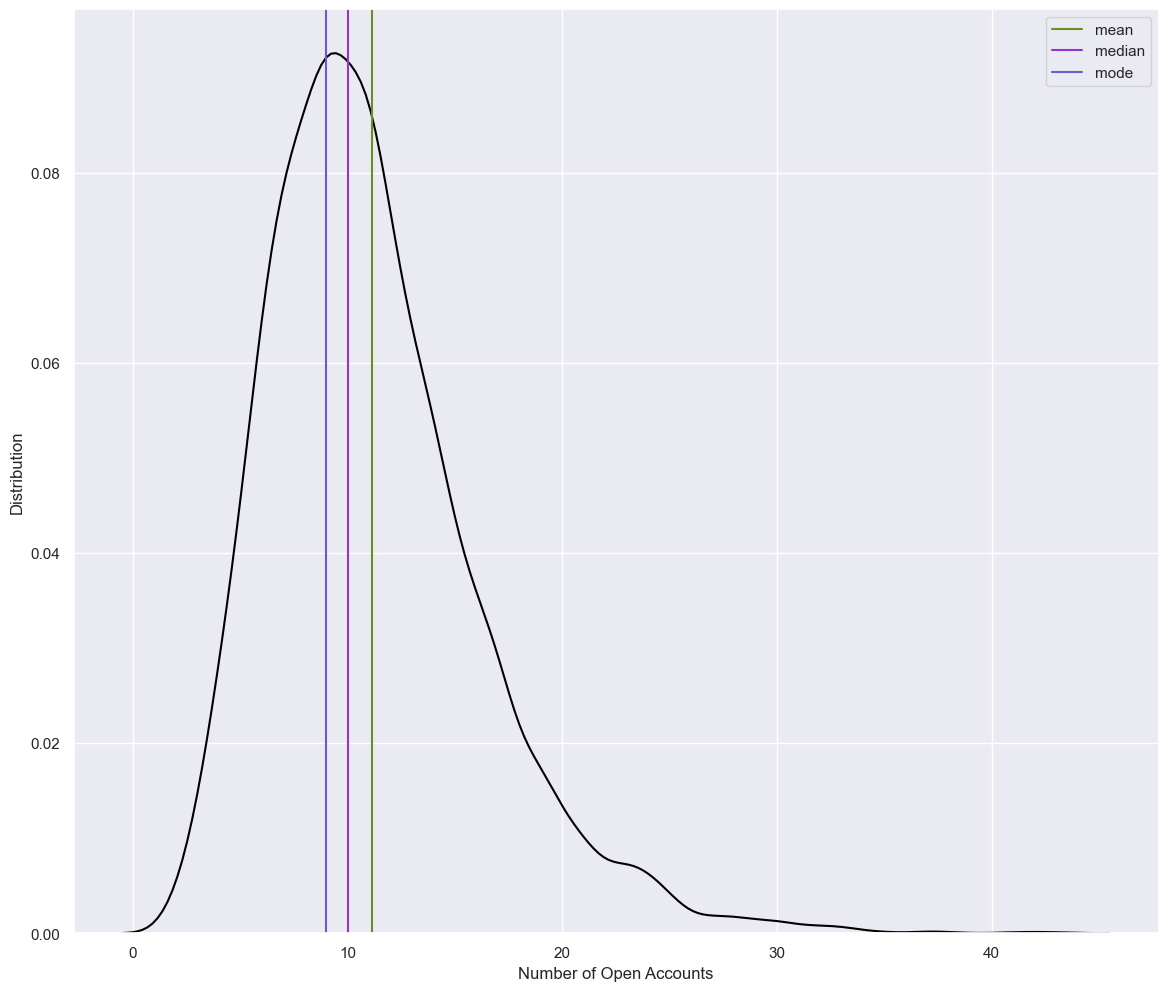

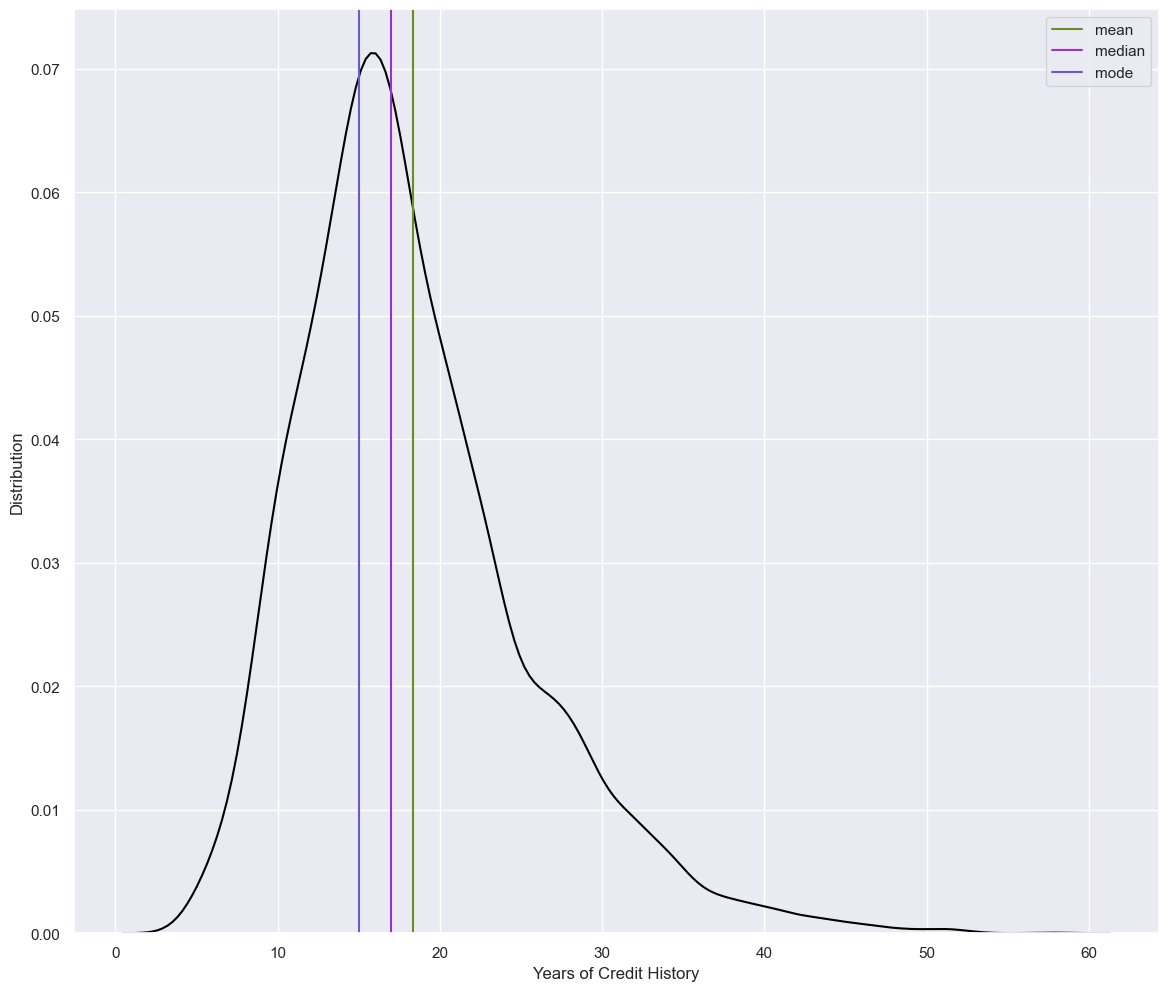

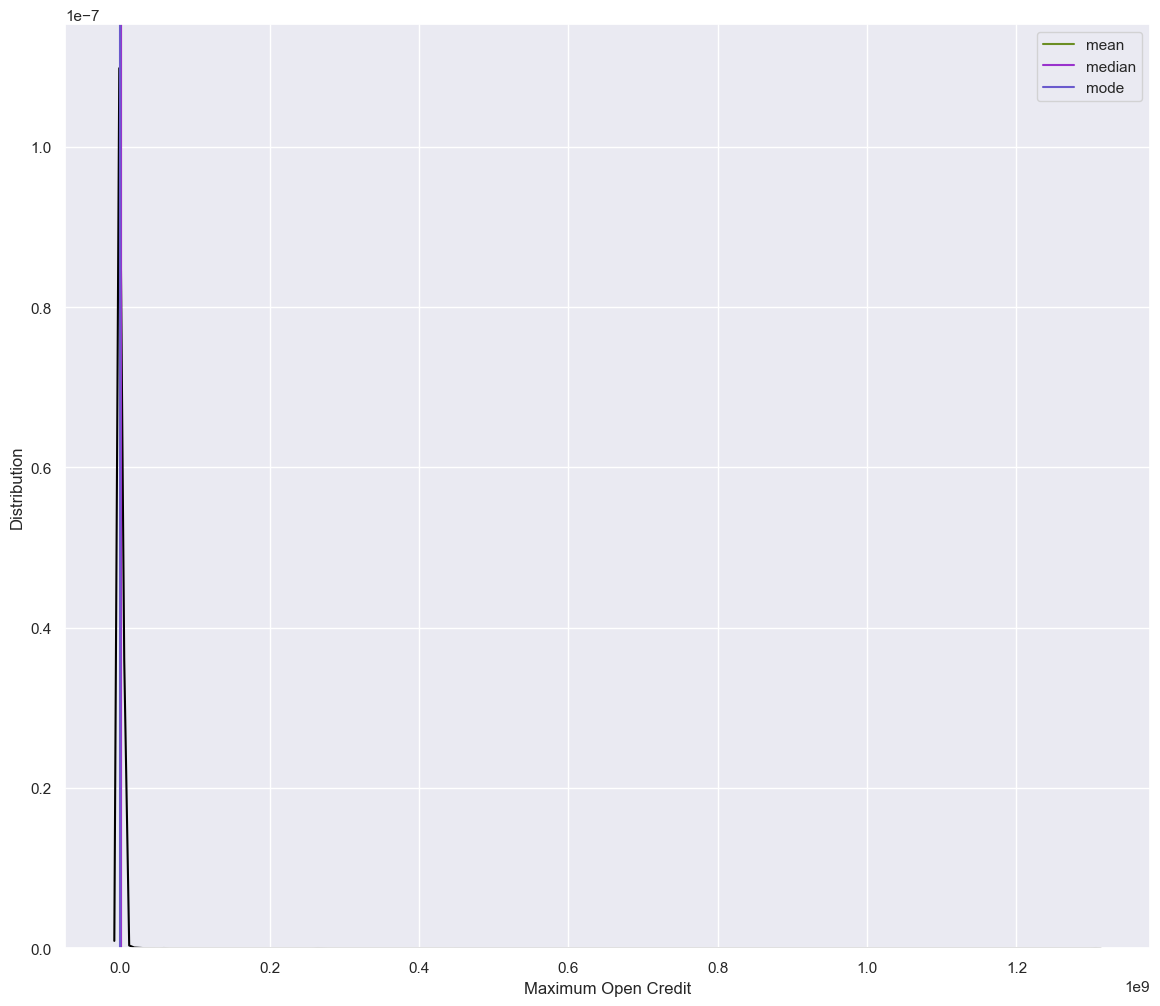

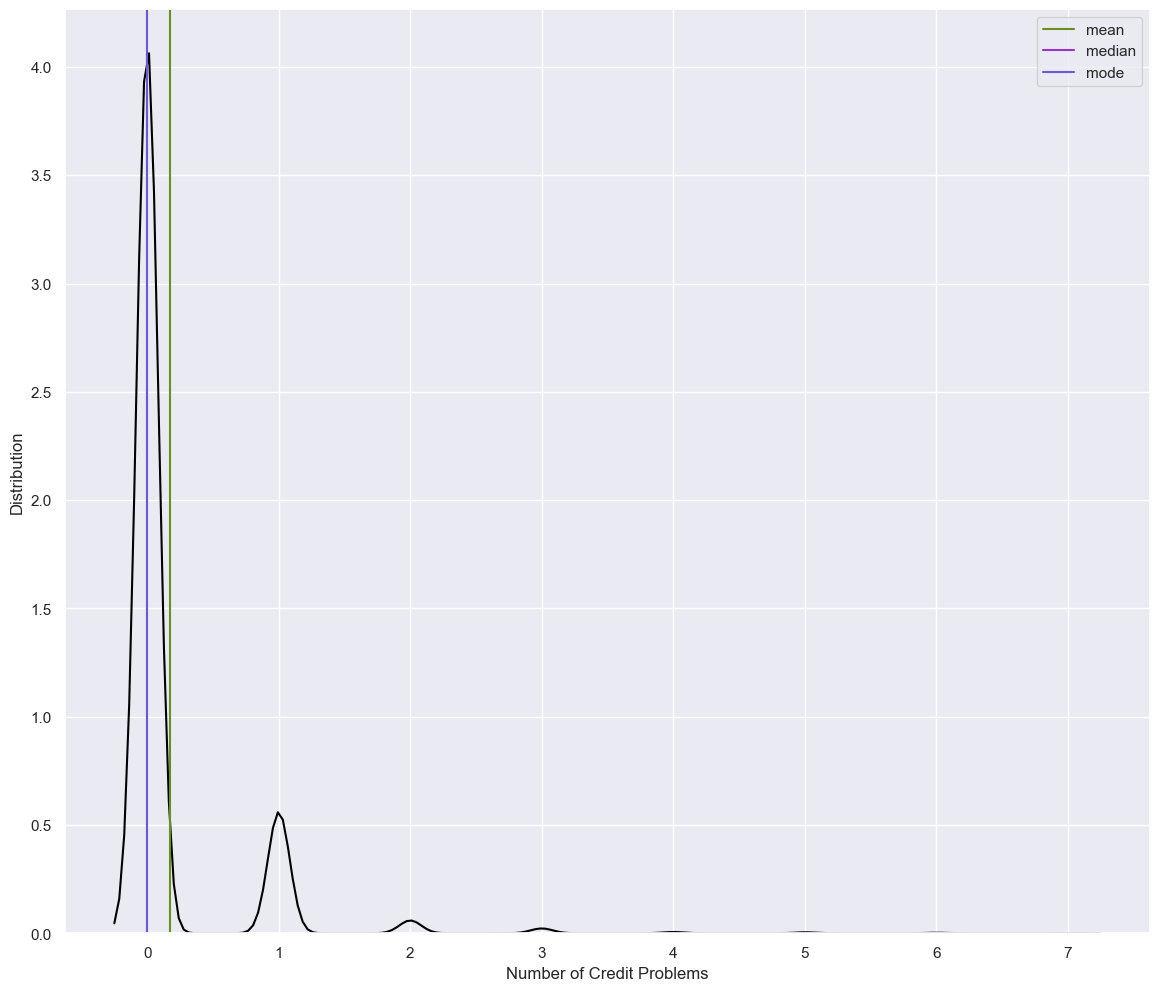

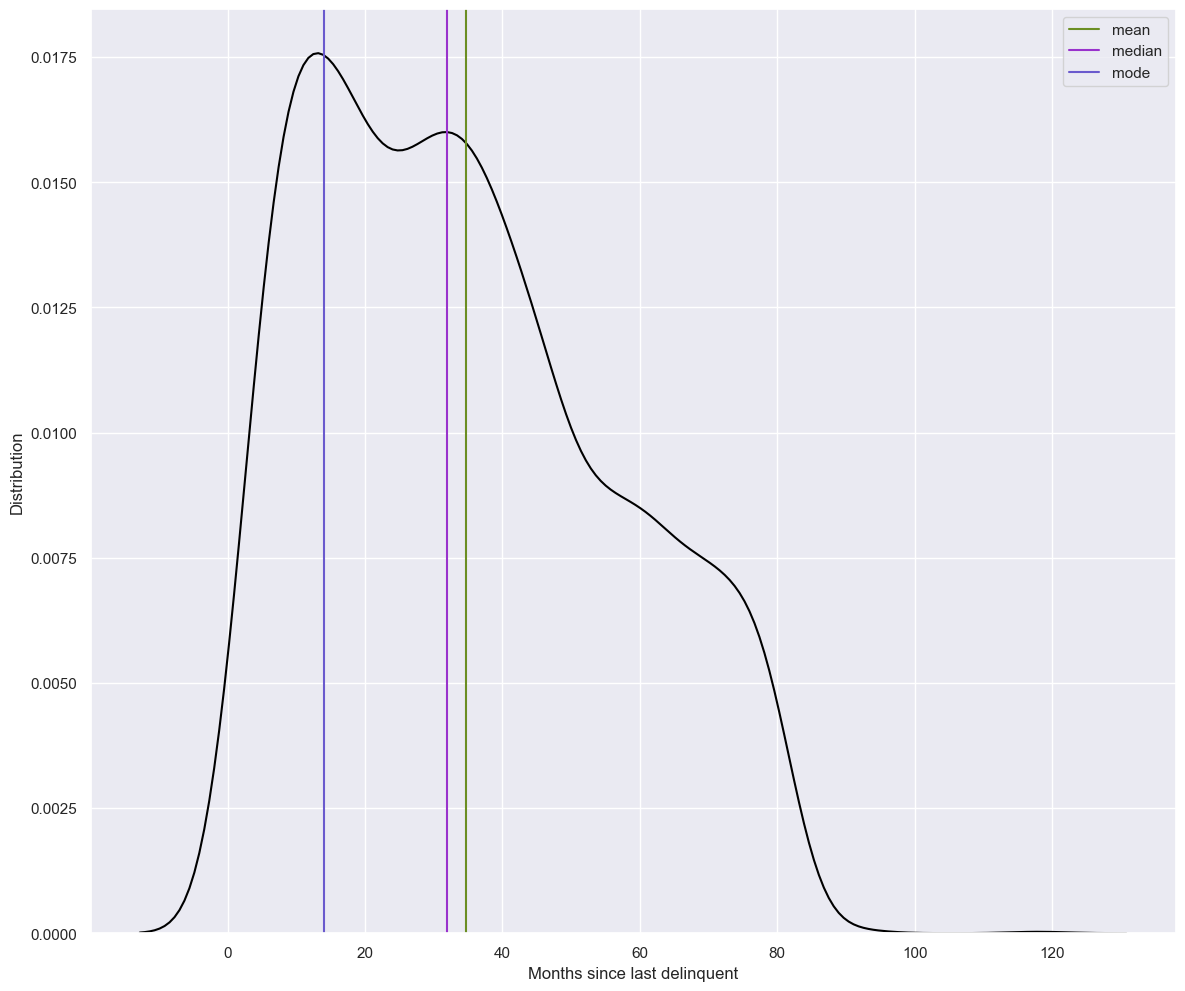

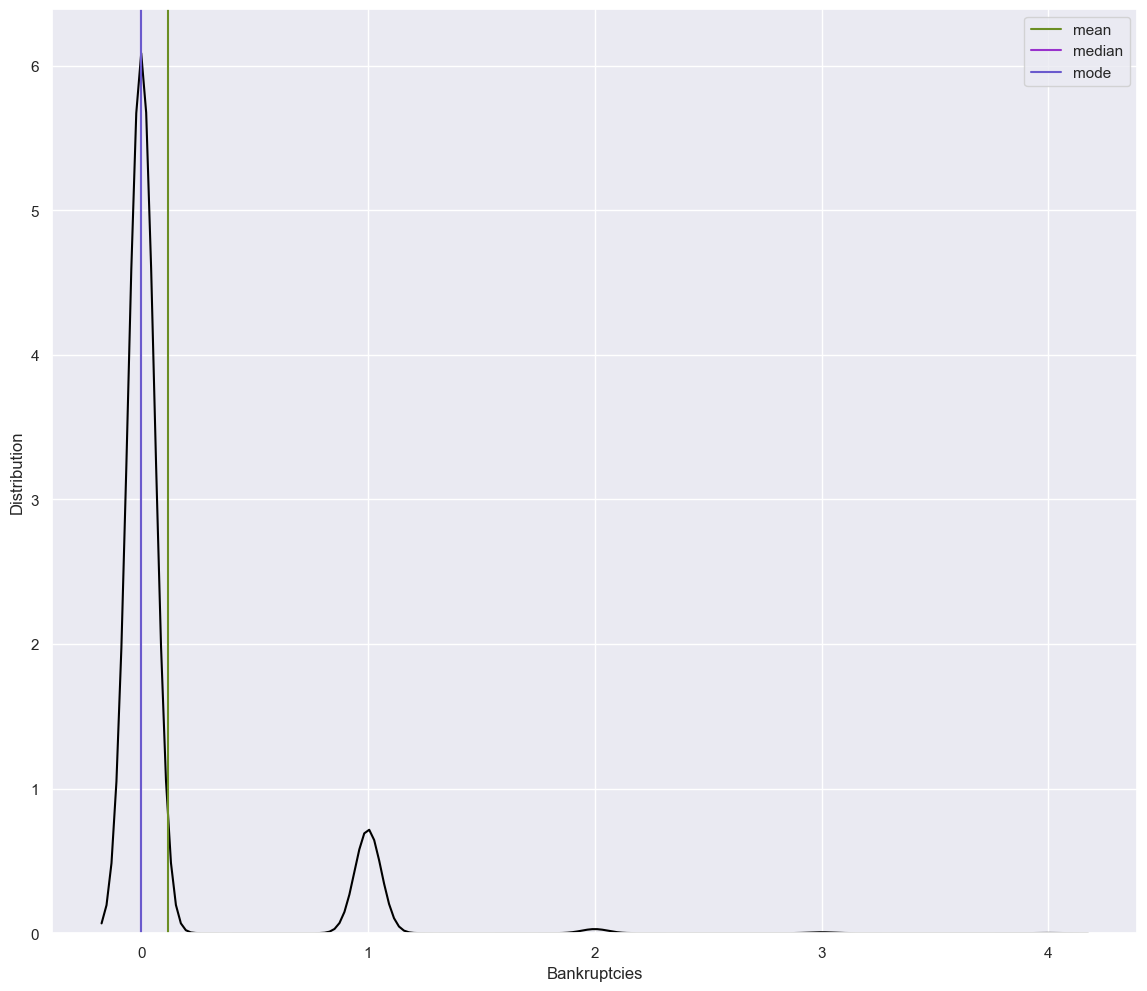

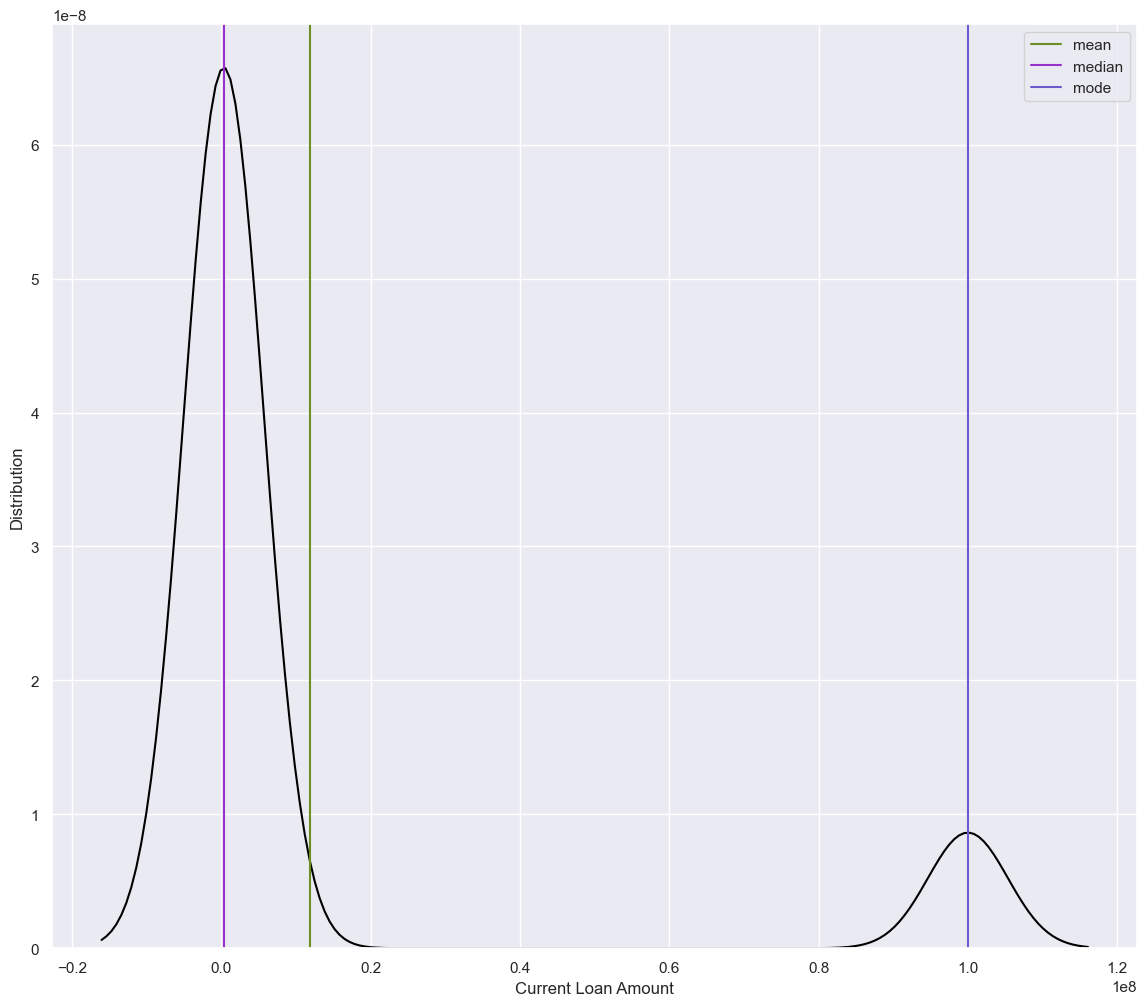

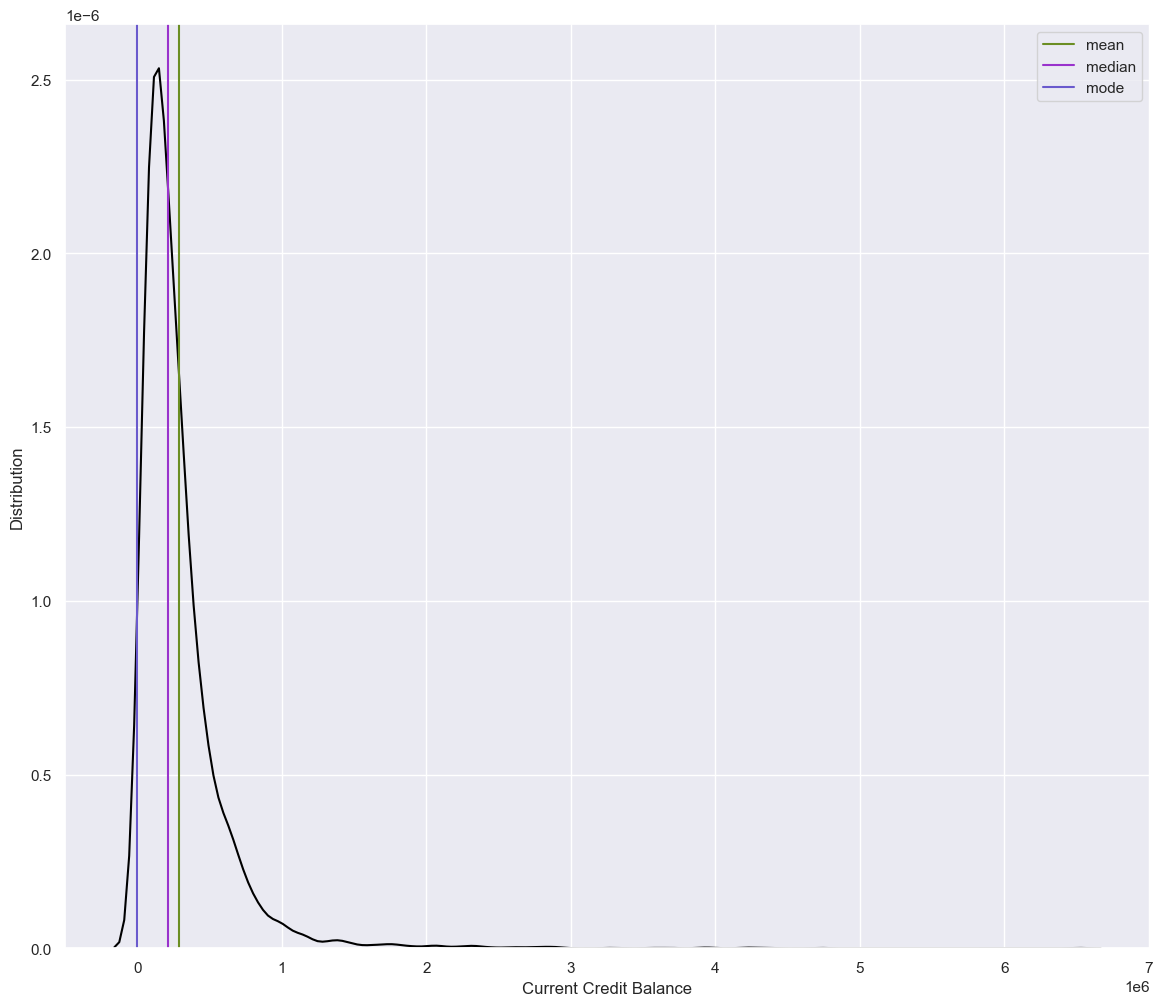

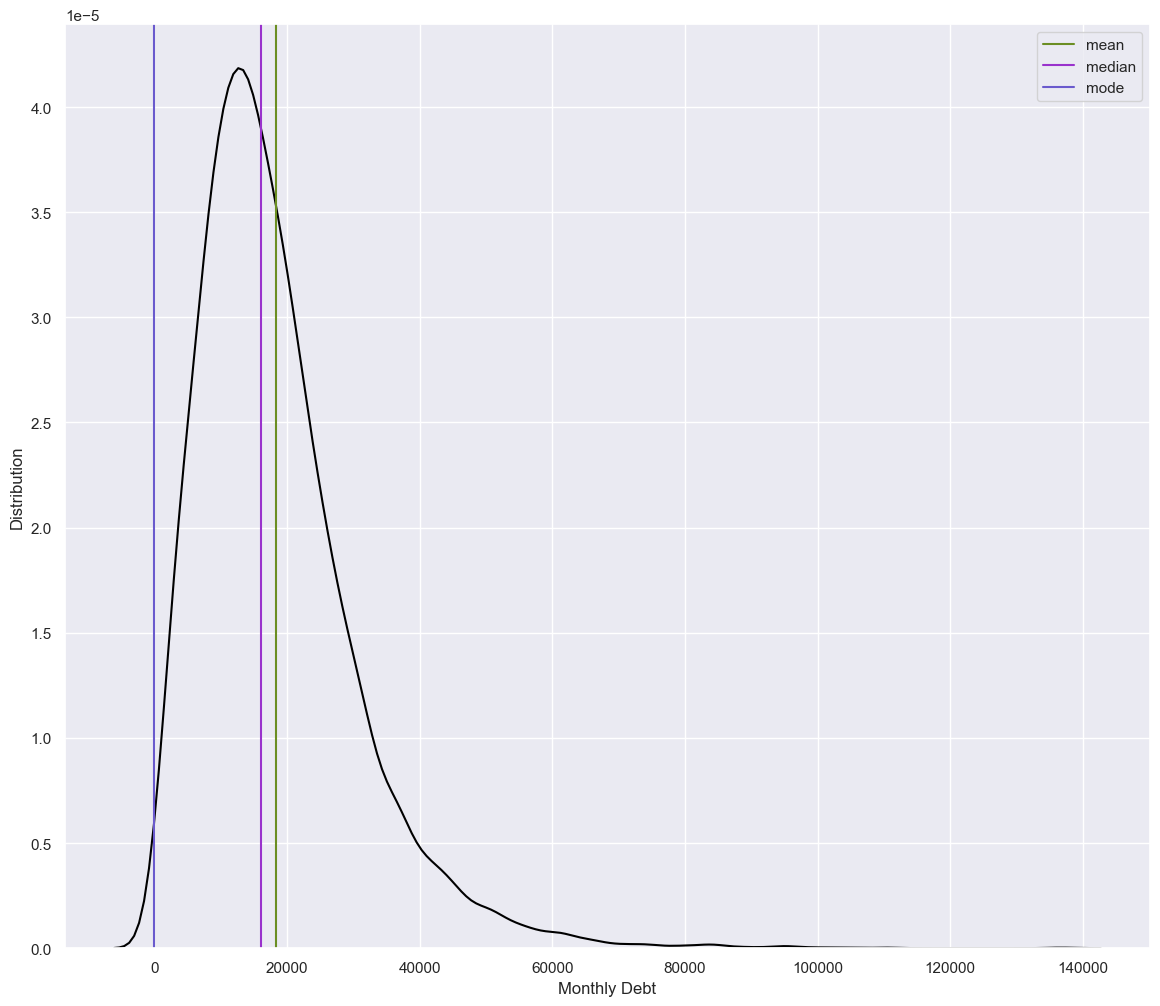

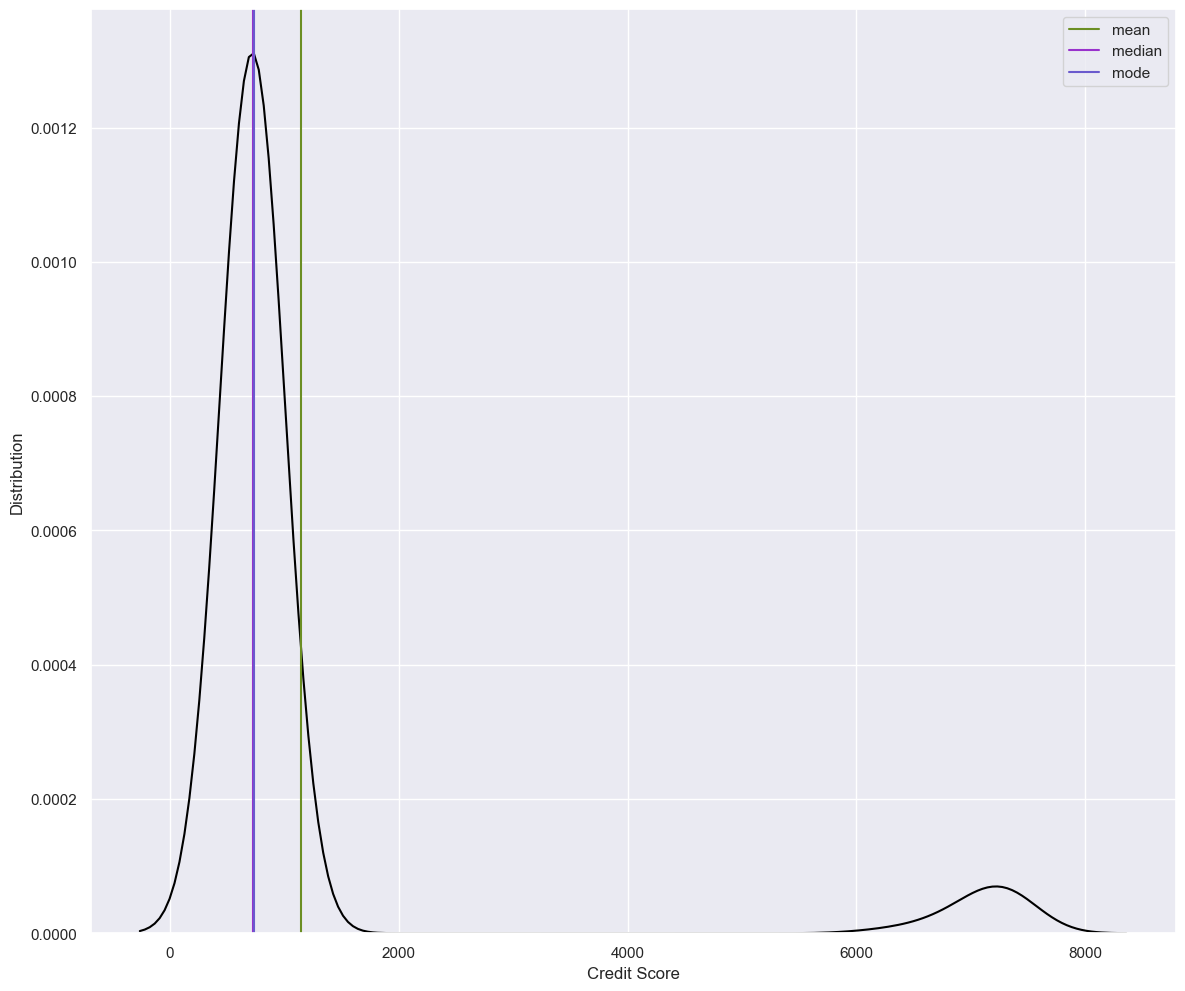

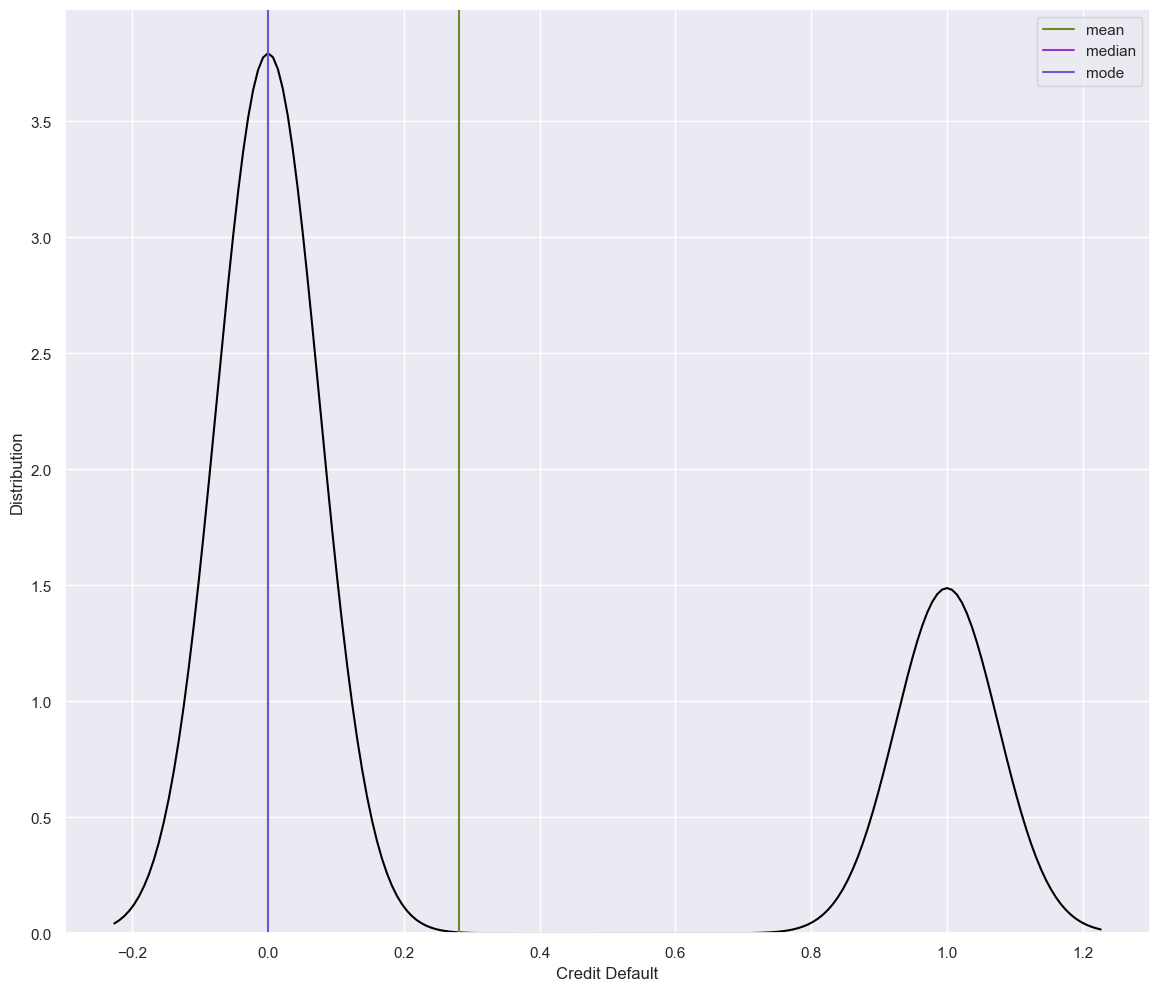

In [73]:
for col in num_cols:
    dist_plot(df_train, col)

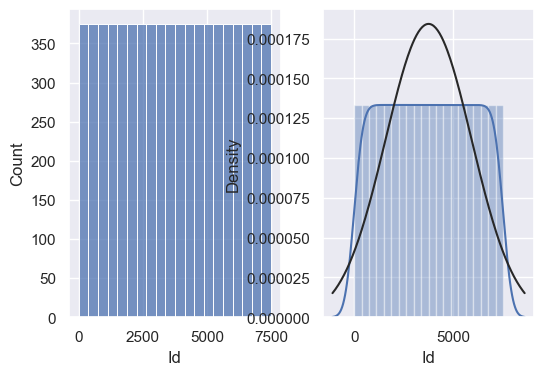

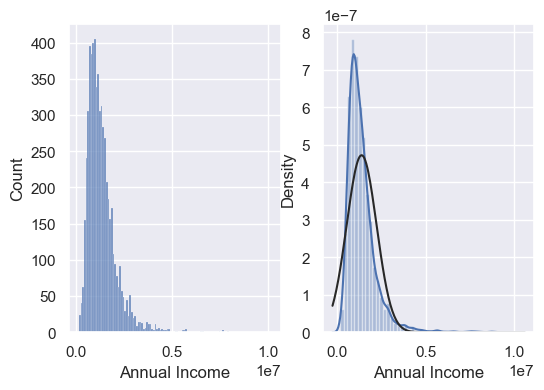

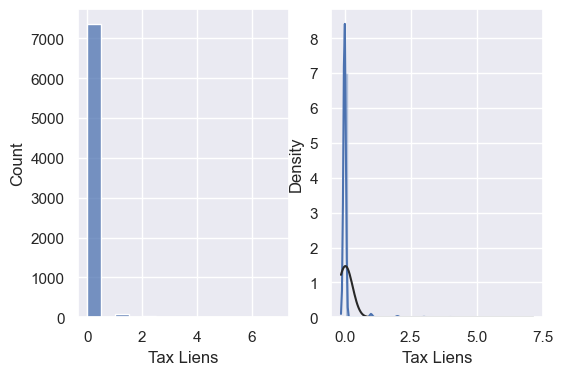

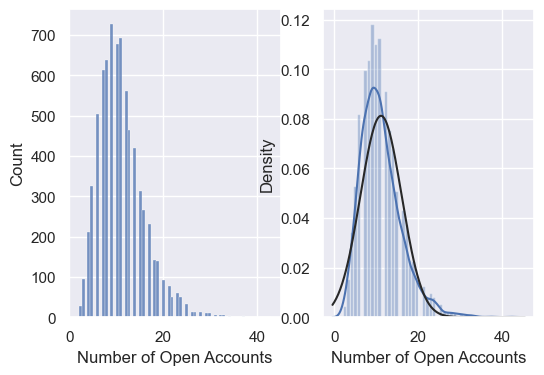

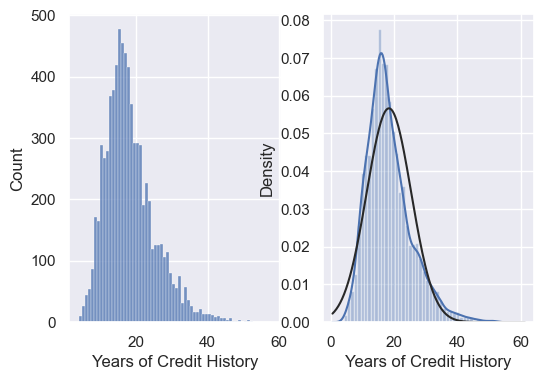

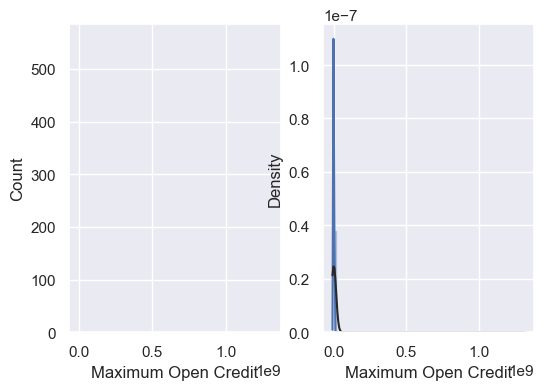

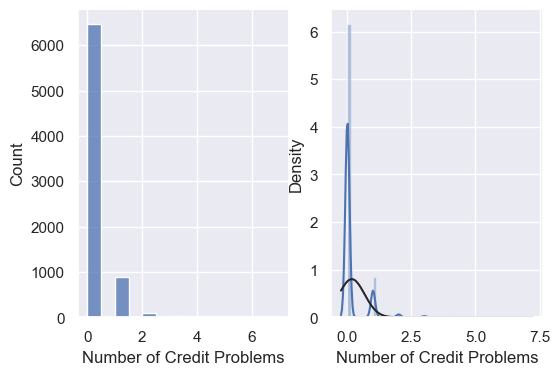

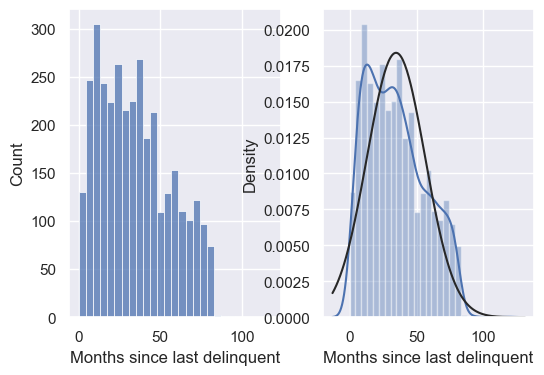

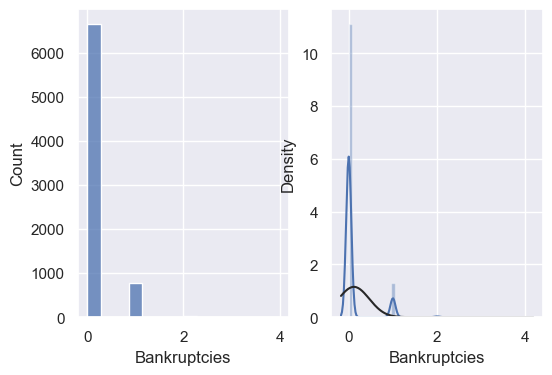

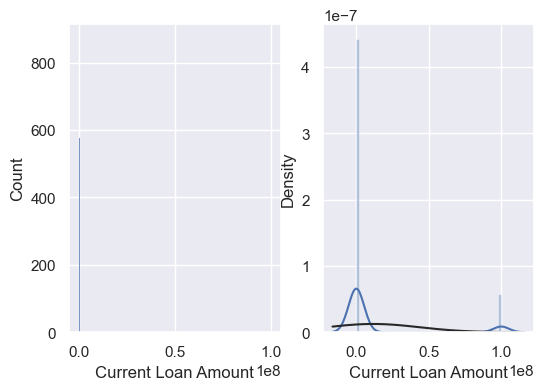

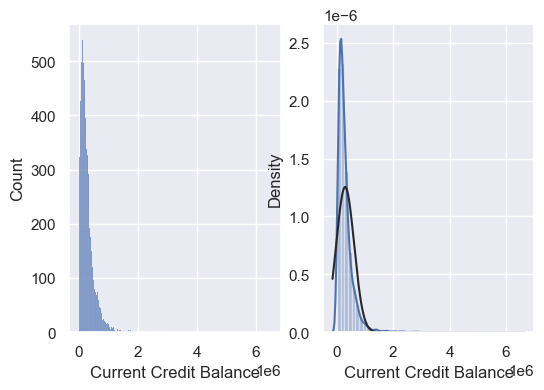

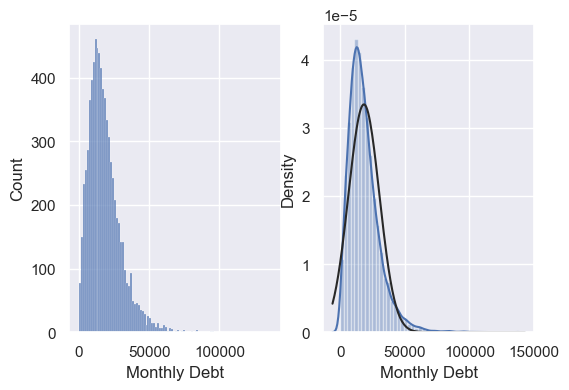

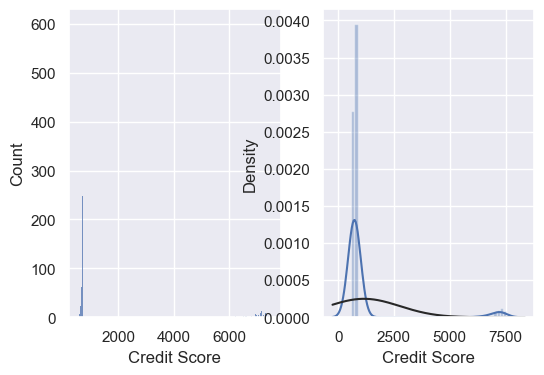

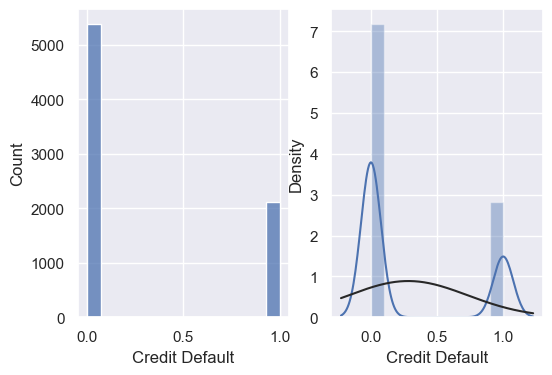

In [74]:
for col in num_cols:
    fig, axes=plt.subplots(figsize=(6, 4), nrows=1, ncols=2)
    sns.histplot(df_train[col], ax=axes[0])
    sns.distplot(df_train[col], ax=axes[1], fit=stats.norm)
    plt.show()

# Correlation Analysis and Feature Engineering

**Correlation Analysis**

One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf

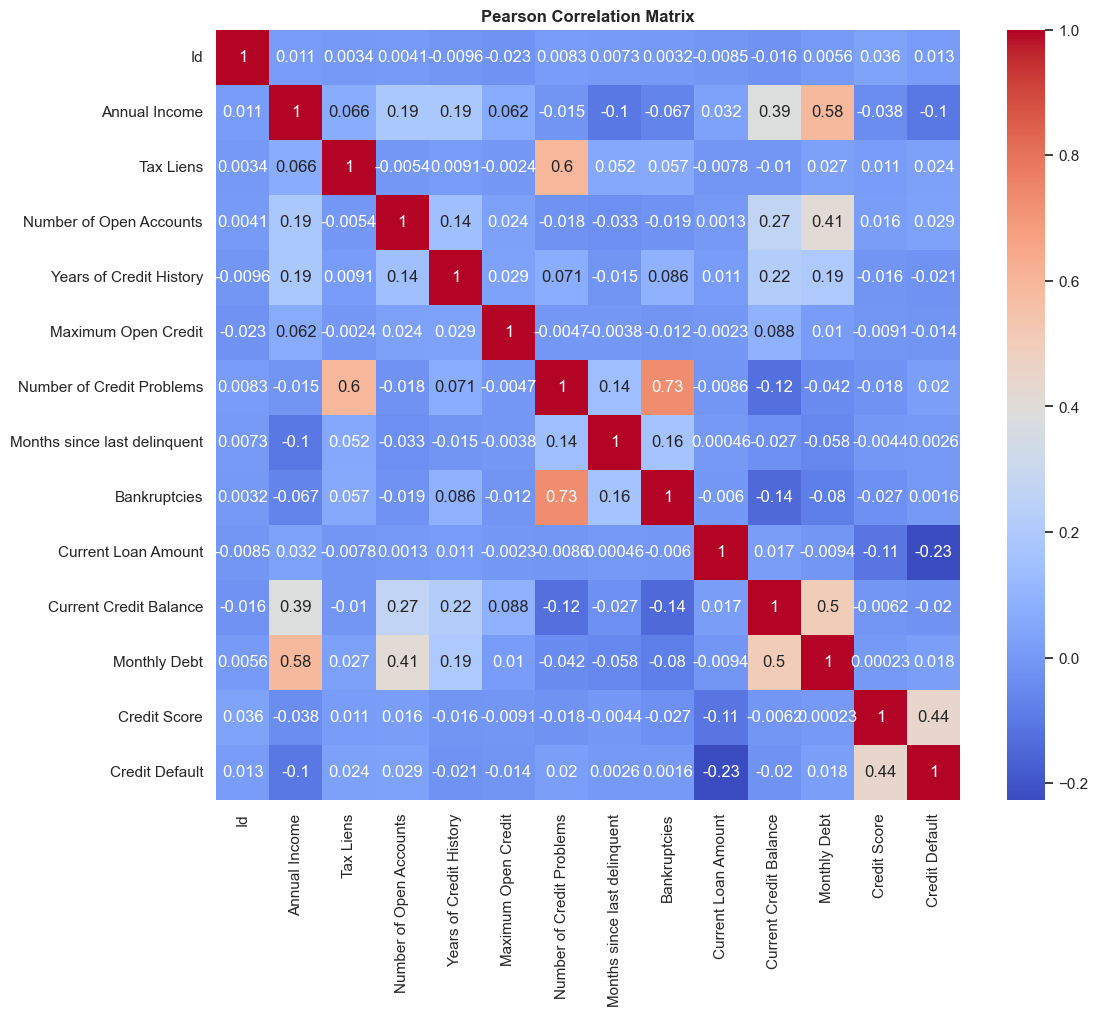

In [76]:
df_numerical = df_train.select_dtypes(include=['number'])
plt.figure(figsize = (12,10))
sns.heatmap(df_numerical.corr(),annot=True,cmap='coolwarm')
plt.title('Pearson Correlation Matrix', fontsize=12, fontweight='bold')
plt.show()

In [77]:
df_train.isna().sum()/df_train.shape[0]*100

Id                               0.000000
Home Ownership                   0.000000
Annual Income                   20.760000
Years in current job             4.946667
Tax Liens                        0.000000
Number of Open Accounts          0.000000
Years of Credit History          0.000000
Maximum Open Credit              0.000000
Number of Credit Problems        0.000000
Months since last delinquent    54.413333
Bankruptcies                     0.186667
Purpose                          0.000000
Term                             0.000000
Current Loan Amount              0.000000
Current Credit Balance           0.000000
Monthly Debt                     0.000000
Credit Score                    20.760000
Credit Default                   0.000000
dtype: float64

In [81]:
#filling null values for train data
df_train['Annual Income'].fillna(df_train['Annual Income'].median(),inplace=True)

df_train['Years in current job'].fillna(df_train['Annual Income'].mode().iloc[0],inplace=True)

df_train['Bankruptcies'].fillna(df_train['Bankruptcies'].median(), inplace=True)

df_train['Credit Score'].fillna(df_train['Credit Score'].median(), inplace=True)

In [80]:
df_train.drop(['Id', 'Number of Credit Problems', 'Monthly Debt','Months since last delinquent'], axis=1, inplace=True)


In [82]:
df_train.isna().sum()/df_train.shape[0]*100

Home Ownership             0.0
Annual Income              0.0
Years in current job       0.0
Tax Liens                  0.0
Number of Open Accounts    0.0
Years of Credit History    0.0
Maximum Open Credit        0.0
Bankruptcies               0.0
Purpose                    0.0
Term                       0.0
Current Loan Amount        0.0
Current Credit Balance     0.0
Credit Score               0.0
Credit Default             0.0
dtype: float64

In [83]:
df_train.isnull().sum()

Home Ownership             0
Annual Income              0
Years in current job       0
Tax Liens                  0
Number of Open Accounts    0
Years of Credit History    0
Maximum Open Credit        0
Bankruptcies               0
Purpose                    0
Term                       0
Current Loan Amount        0
Current Credit Balance     0
Credit Score               0
Credit Default             0
dtype: int64

In [84]:
# splitting the train dataset into X and y
X = df_train.drop(['Credit Default'], axis=1)
y = df_train['Credit Default']

In [86]:
df_test = pd.read_csv('test.csv')
ID = df_test.Id
df_test.drop(['Id', 'Number of Credit Problems', 'Monthly Debt','Months since last delinquent'], axis=1, inplace=True)

In [87]:
#filling null values for test data
df_test['Annual Income'].fillna(df_test['Annual Income'].median(),inplace=True)

df_test['Years in current job'].fillna(df_test['Annual Income'].mode().iloc[0],inplace=True)

df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].median(), inplace=True)

df_test['Credit Score'].fillna(df_test['Credit Score'].median(), inplace=True)

In [88]:
df_test.isna().sum()

Home Ownership             0
Annual Income              0
Years in current job       0
Tax Liens                  0
Number of Open Accounts    0
Years of Credit History    0
Maximum Open Credit        0
Bankruptcies               0
Purpose                    0
Term                       0
Current Loan Amount        0
Current Credit Balance     0
Credit Score               0
dtype: int64

In [89]:
X = pd.get_dummies(X, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [90]:
X.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Bankruptcies,Current Loan Amount,Current Credit Balance,Credit Score,Home Ownership_Home Mortgage,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Short Term
0,482087.0,0.0,11.0,26.3,685960.0,1.0,99999999.0,47386.0,749.0,False,...,False,False,False,False,False,False,False,False,False,True
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,264968.0,394972.0,737.0,False,...,False,False,False,False,False,False,False,False,False,False
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,99999999.0,308389.0,742.0,True,...,False,False,False,False,False,False,False,False,False,True
3,805068.0,0.0,8.0,22.5,147400.0,1.0,121396.0,95855.0,694.0,False,...,False,False,False,False,False,False,False,False,False,True
4,776264.0,0.0,13.0,13.6,385836.0,0.0,125840.0,93309.0,719.0,False,...,False,False,False,False,False,False,False,False,False,True


In [91]:
X.columns.tolist()

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Credit Score',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Years in current job_1 year',
 'Years in current job_10+ years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in current job_9 years',
 'Years in current job_< 1 year',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpose_medical bills',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_renewable energy',
 'Purpose_small business',
 'Purpose_take a trip',
 'Purpose_vacation',
 'Purpose_wedding',
 'Te

In [93]:
X = X.drop('Purpose_renewable energy', axis=1)

**Normalizing data**

In [94]:
scaler = MinMaxScaler()

In [95]:
train= scaler.fit_transform(X)

In [96]:
test = scaler.transform(df_test)

In [97]:
# Fit Logistic Regression model
logistic_model = LogisticRegression().fit(train, y)

# Predict classes and probabilities
predicted_classes = logistic_model.predict(train)
predicted_probabilities = logistic_model.predict_proba(train)

# Calculate ROC-AUC score
roc_auc = round(roc_auc_score(y, predicted_probabilities[:, 1]), 4)

# Print ROC-AUC score and classification report
print(f'ROC-AUC = {roc_auc}\n')
print(classification_report(y, predicted_classes))

ROC-AUC = 0.7612

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      5387
           1       0.88      0.23      0.37      2113

    accuracy                           0.78      7500
   macro avg       0.82      0.61      0.62      7500
weighted avg       0.80      0.78      0.72      7500



In [98]:
logistic_model.coef_

array([[-3.46572547,  0.88131384,  0.85327496, -0.19878016, -0.30814277,
         0.19932111, -4.25116722,  0.00567302,  5.53739356,  0.14154758,
         0.25035456,  0.50544362, -0.51156364, -0.46494815, -0.46971442,
        -0.5159676 , -0.47377591, -0.50544621, -0.41897003, -0.54941172,
        -0.36270028, -0.53268113, -0.54503807, -0.71294441, -0.30645856,
        -0.56721791, -0.79119369, -0.40741125, -0.80995228, -0.24410595,
        -0.65098333, -0.4299459 ,  0.40436648, -0.28000325, -0.19139366,
         0.01940656, -0.9722375 ]])

In [100]:
logistic_model.predict(test)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [101]:
# Train the k-nearest neighbors model
knn_model = KNeighborsClassifier().fit(train, y)

# Make predictions and calculate probabilities
predicted_classes = knn_model.predict(train)
predicted_probabilities = knn_model.predict_proba(train)

# Calculate ROC-AUC score
roc_auc = round(roc_auc_score(y, predicted_probabilities[:, 1]), 4)

# Print ROC-AUC score and classification report
print(f'ROC-AUC = {roc_auc}\n')
print(classification_report(y, predicted_classes))

ROC-AUC = 0.8551

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5387
           1       0.74      0.48      0.59      2113

    accuracy                           0.81      7500
   macro avg       0.78      0.71      0.73      7500
weighted avg       0.80      0.81      0.79      7500



In [105]:
predictions=knn_model.predict(test)
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [102]:
# Train a decision tree classifier with a maximum depth of 5
decision_tree_model = DecisionTreeClassifier(max_depth=5).fit(train, y)

# Make predictions and calculate probabilities
predicted_classes = decision_tree_model.predict(train)
predicted_probabilities = decision_tree_model.predict_proba(train)

# Calculate and print the ROC-AUC score
roc_auc = round(roc_auc_score(y, predicted_probabilities[:, 1]), 4)
print(f'ROC-AUC = {roc_auc}\n')

# Print the classification report
print(classification_report(y, predicted_classes))


ROC-AUC = 0.7563

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      5387
           1       0.67      0.40      0.50      2113

    accuracy                           0.77      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.76      0.77      0.75      7500



In [104]:
predictions = decision_tree_model.predict(test)
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [106]:
# Train a random forest classifier with a maximum depth of 5
random_forest_model = RandomForestClassifier(max_depth=5).fit(train, y)

# Make predictions and calculate probabilities
predicted_classes = random_forest_model.predict(train)
predicted_probabilities = random_forest_model.predict_proba(train)

# Calculate and print the ROC-AUC score
roc_auc = round(roc_auc_score(y, predicted_probabilities[:, 1]), 4)
print(f'ROC-AUC = {roc_auc}\n')

# Print the classification report
print(classification_report(y, predicted_classes))

ROC-AUC = 0.7907

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5387
           1       1.00      0.19      0.32      2113

    accuracy                           0.77      7500
   macro avg       0.88      0.59      0.59      7500
weighted avg       0.83      0.77      0.71      7500



In [107]:
predictions=random_forest_model.predict(test)
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [108]:
output = pd.DataFrame({'Id': ID})
output['Credit Default'] = predictions
output.head()

,Id,Credit Default
0,7500,0
1,7501,0
2,7502,1
3,7503,0
4,7504,0


In [109]:
output.to_csv('submission.csv', index=False)

In [110]:
# 34 - let's see how many defaults are expected for the model
output['Credit Default'].value_counts()

Credit Default
0    2340
1     160
Name: count, dtype: int64